In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_test  = pd.read_csv("/kaggle/input/playground-series-s4e9/test.csv")
df_train = pd.read_csv("/kaggle/input/playground-series-s4e9/train.csv")

exploring the data

In [3]:
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [4]:
df_test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


### looking for outliers and missing values


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [6]:
df_train.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [7]:
#geting the % of the missing
missing_train = df_train.isna().mean() * 100

print("Columns in df_train with more than 10% missing values:")
print(missing_train[missing_train > 0])

Columns in df_train with more than 10% missing values:
fuel_type       2.696080
accident        1.300568
clean_title    11.360876
dtype: float64


so most missing are in {fuel_type//accident//clean_title} now for outliers

In [8]:
df_train.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

columns that are of high intrest to us are milage , model year

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0-10k'),
  Text(1, 0, '10k-20k'),
  Text(2, 0, '20k-30k'),
  Text(3, 0, '30k-40k'),
  Text(4, 0, '40k-50k'),
  Text(5, 0, '50k-60k'),
  Text(6, 0, '60k-70k'),
  Text(7, 0, '70k-80k'),
  Text(8, 0, '80k-90k'),
  Text(9, 0, '90k-100k'),
  Text(10, 0, '100k+')])

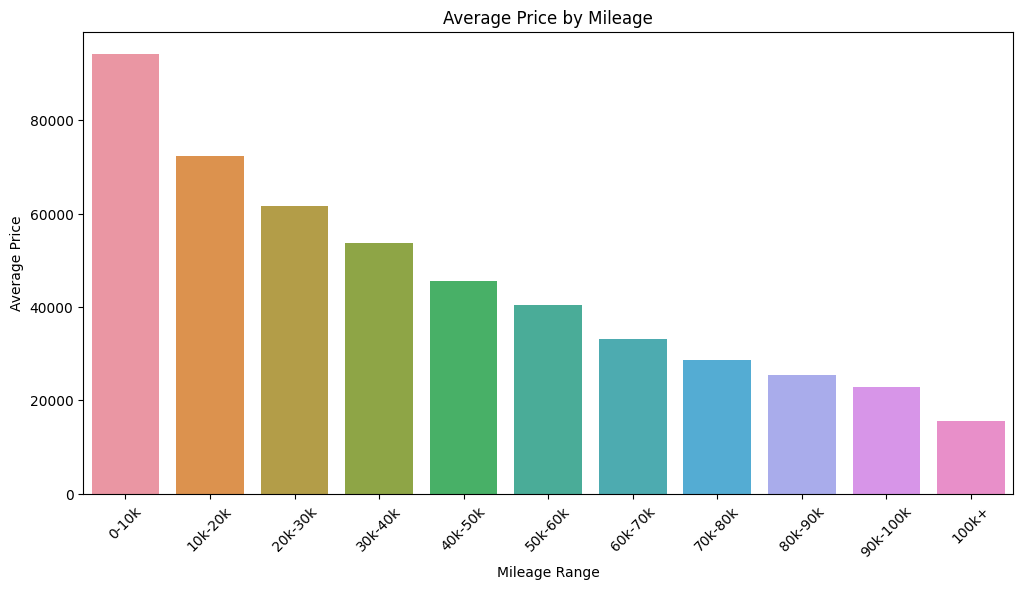

In [9]:
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000]
labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k', '100k+']
xx = pd.cut(df_train['milage'], bins=bins, labels=labels, include_lowest=True)
plt.figure(figsize=(12, 6))
sns.barplot(x=xx, y='price', data=df_train[:10000], errorbar=None)
plt.title('Average Price by Mileage')
plt.xlabel('Mileage Range')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

using IQR -> Q3-Q1 then we make a condition which act like a mask applying it to the DF and creating a copy of it so we dont loss the original

In [10]:
print("original data number of rows: ",df_train.shape[0])
Q1 = df_train['milage'].quantile(0.25)
Q3 = df_train['milage'].quantile(0.75)
IQR = Q3 - Q1

# Define the condition for outliers
outlier_condition = (df_train['milage'] >= (Q1 - 1.5 * IQR)) & (df_train['milage'] <= (Q3 + 1.5 * IQR))

# Select rows that are not outliers
df_train_clean = df_train.loc[outlier_condition]

# Display the cleaned DataFrame
print("the cleaned data number of rows: ",df_train_clean.shape[0])
print("the amount removed: ",df_train.shape[0]-df_train_clean.shape[0])
##doing the same to the test:
Q1 = df_test['milage'].quantile(0.25)
Q3 = df_test['milage'].quantile(0.75)
IQR = Q3 - Q1

# Define the condition for outliers
outlier_condition = (df_test['milage'] >= (Q1 - 1.5 * IQR)) & (df_test['milage'] <= (Q3 + 1.5 * IQR))

# Select rows that are not outliers
df_test_copy = df_test.loc[outlier_condition]

original data number of rows:  188533
the cleaned data number of rows:  186767
the amount removed:  1766


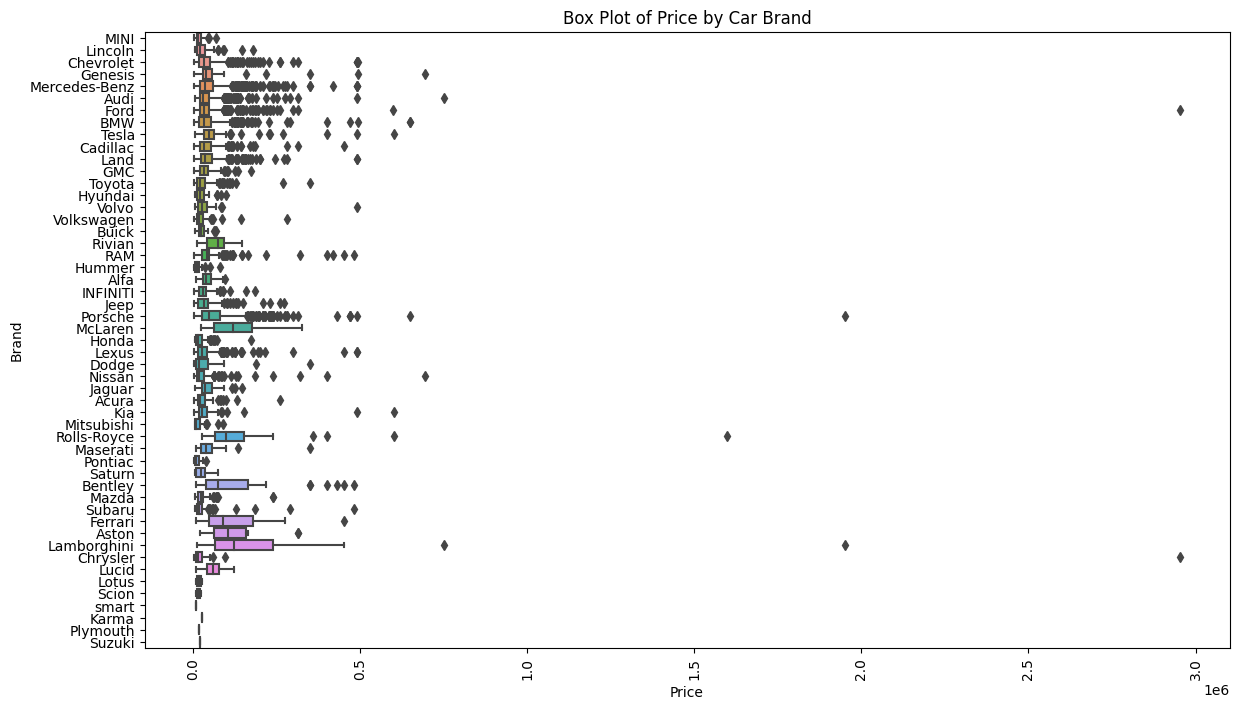

In [11]:
plt.figure(figsize=(14, 8))
sns.boxplot(y='brand', x='price', data=df_train[:10000])
plt.title('Box Plot of Price by Car Brand')
plt.ylabel('Brand')
plt.xlabel('Price')
plt.xticks(rotation=90)
plt.show()

In [12]:
print("original data number of rows: ",df_train_clean.shape[0])
Q1 = df_train_clean['price'].quantile(0.25)
Q3 = df_train_clean['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the condition for outliers
outlier_condition = (df_train_clean['price'] >= (Q1 - 1.5 * IQR)) & (df_train_clean['price'] <= (Q3 + 1.5 * IQR))

# Select rows that are not outliers
df_train_clean2 = df_train_clean.loc[outlier_condition]

# Display the cleaned DataFrame
print("the cleaned data number of rows: ",df_train_clean2.shape[0])
print("the amount removed: ",df_train_clean.shape[0]-df_train_clean2.shape[0])

original data number of rows:  186767
the cleaned data number of rows:  175900
the amount removed:  10867


we drop useless col like ID which serve no pourpres in ML accurcy

In [13]:
df_train_clean2=df_train_clean2.drop(columns =["id"])
df_test_copy = df_test_copy.drop(columns=['id'])

usualy cars that gone throgh an a accidents have lower prices. so we will se what to do about it

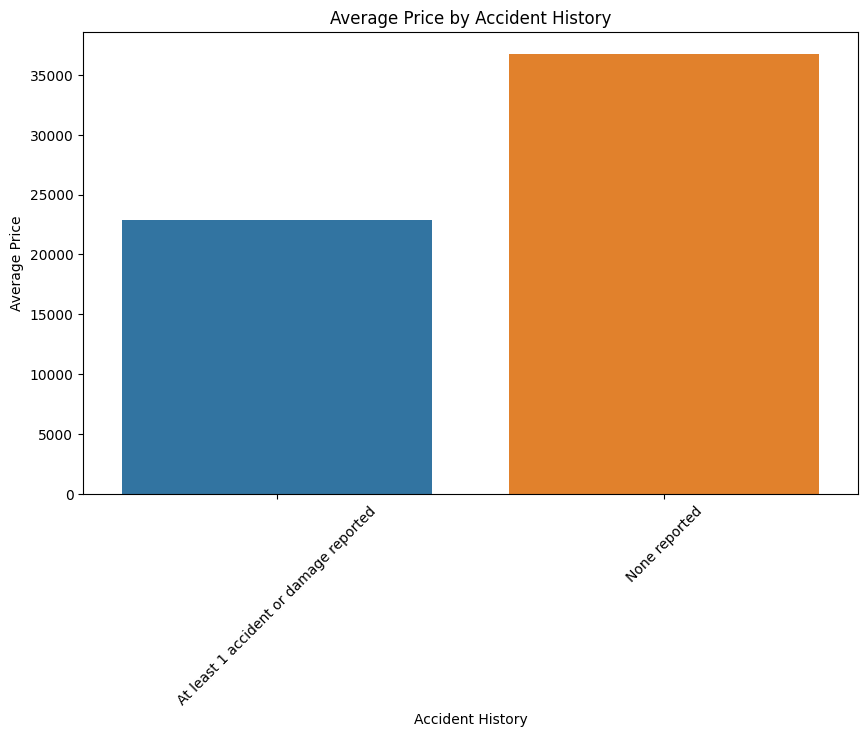

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='accident', y='price', data=df_train_clean2, errorbar=None)
plt.title('Average Price by Accident History')
plt.xlabel('Accident History')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [15]:
df_train_clean2.isnull().mean()*100

brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        2.656623
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         1.260375
clean_title     10.718590
price            0.000000
dtype: float64

dealing up with missing data :

 fuel_type       2.656623
 
 accident        1.260375
 
 clean_title    10.718590

In [16]:
df_test["clean_title"].unique()# so we will use binary to fix it

array(['Yes', nan], dtype=object)

In [17]:

df_train_clean2['clean_title'].fillna('No', inplace=True)# this will replace nan with no
# Encode 'Yes' as 1 and 'No' as 0
df_train_clean2['clean_title'] = df_train_clean2['clean_title'].apply(lambda x: 1 if x == 'Yes' else 0)

# we will mix it with milage because the more the car is driven the higher the chance it have major issues like accidents or severe damage
df_train_clean2['clean_title_milage'] = df_train_clean2['clean_title'] * df_train_clean2['milage']

#####
df_test_copy['clean_title'].fillna('No', inplace=True)# this will replace nan with no
# Encode 'Yes' as 1 and 'No' as 0
df_test_copy['clean_title'] = df_test_copy['clean_title'].apply(lambda x: 1 if x == 'Yes' else 0)

# we will mix it with milage because the more the car is driven the higher the chance it have major issues like accidents or severe damage
df_test_copy['clean_title_milage'] = df_test_copy['clean_title'] * df_test_copy['milage']

/tmp/ipykernel_30/292978964.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_clean2['clean_title'].fillna('No', inplace=True)# this will replace nan with no
/tmp/ipykernel_30/292978964.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [18]:
df_train_clean2.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,clean_title_milage
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,1,4999,143250
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,1,13900,136731
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,1,45000,19500
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,1,97500,7388
5,Audi,A6 2.0T Sport,2018,40950,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,White,–,None reported,1,29950,40950


we fixed the clean title which will help us with the ML part using feture engineering

In [19]:
df_test["accident"].unique()

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

we will do similer thing but we will change nan to None reported and then change them into a binary

In [20]:
df_train_clean2['accident'].fillna('None reported', inplace=True)# this will replace nan with no
# Encode 'Yes' as 1 and 'No' as 0
df_train_clean2['accident'] = df_train_clean2['accident'].apply(lambda x: 1 if x == 'At least 1 accident or damage reported' else 0)

# we will mix it with milage because the more the car is driven the higher the chance it have major issues like accidents or severe damage
df_train_clean2['accident_milage'] = df_train_clean2['accident'] * df_train_clean2['milage']

df_train_clean2.head()
############

df_test_copy['accident'].fillna('None reported', inplace=True)# this will replace nan with no
# Encode 'Yes' as 1 and 'No' as 0
df_test_copy['accident'] = df_test_copy['accident'].apply(lambda x: 1 if x == 'At least 1 accident or damage reported' else 0)

# we will mix it with milage because the more the car is driven the higher the chance it have major issues like accidents or severe damage
df_test_copy['accident_milage'] = df_test_copy['accident'] * df_test_copy['milage']


/tmp/ipykernel_30/3987288069.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_clean2['accident'].fillna('None reported', inplace=True)# this will replace nan with no
/tmp/ipykernel_30/3987288069.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doin

now with that out of the way one last thing fuel type

In [21]:
df_test["fuel_type"].unique()
df_train_clean2.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'clean_title_milage', 'accident_milage'],
      dtype='object')

In [22]:
#first what is - not supp.. this is stupid

df_train_clean2['fuel_type'] = df_train_clean2['fuel_type'].replace(['–', 'not supported'], 'Unknown')

#replacing nan with the  mode

df_train_clean2['fuel_type'].fillna(df_train_clean2['fuel_type'].mode()[0], inplace=True)

df_train_clean2["fuel_type"].unique()
####
#first what is - not supp.. this is stupid

df_test_copy['fuel_type'] = df_test_copy['fuel_type'].replace(['–', 'not supported'], 'Unknown')

#replacing nan with the  mode

df_test_copy['fuel_type'].fillna(df_test_copy['fuel_type'].mode()[0], inplace=True)

df_test_copy["fuel_type"].unique()


/tmp/ipykernel_30/1208999018.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_clean2['fuel_type'].fillna(df_train_clean2['fuel_type'].mode()[0], inplace=True)
/tmp/ipykernel_30/1208999018.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

array(['Gasoline', 'Hybrid', 'Diesel', 'E85 Flex Fuel', 'Plug-In Hybrid',
       'Unknown'], dtype=object)

In [23]:
df_train_clean2.isnull().sum()

brand                 0
model                 0
model_year            0
milage                0
fuel_type             0
engine                0
transmission          0
ext_col               0
int_col               0
accident              0
clean_title           0
price                 0
clean_title_milage    0
accident_milage       0
dtype: int64

In [24]:
df_train_clean2.columns
df_copy=df_train_clean2

df_copy.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,clean_title_milage,accident_milage
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,1,1,4999,143250,143250
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,0,1,13900,136731,0
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,0,1,45000,19500,0
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,0,1,97500,7388,0
5,Audi,A6 2.0T Sport,2018,40950,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,White,–,0,1,29950,40950,0


In [25]:
df_test_copy.isnull().sum()

brand                 0
model                 0
model_year            0
milage                0
fuel_type             0
engine                0
transmission          0
ext_col               0
int_col               0
accident              0
clean_title           0
clean_title_milage    0
accident_milage       0
dtype: int64

In [26]:
!pip install category-encoders

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import category_encoders as ce

In [28]:
from sklearn.impute import KNNImputer

def knn_impute(df, n_neighbors=5):
    df_encoded = df.copy()
    for col in df_encoded.select_dtypes(include='object').columns:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_encoded), columns=df_encoded.columns)
    for col in df.select_dtypes(include='object').columns:
        df_imputed[col] = df_imputed[col].round().astype(int).map(
            dict(enumerate(df[col].astype('category').cat.categories)))
    return df_imputed

In [29]:
df_train_imputed = knn_impute(df_train, n_neighbors=25)
df_test_imputed = knn_impute(df_test, n_neighbors=25)

In [30]:
from sklearn.preprocessing import OrdinalEncoder
cat_cols_train = df_train_imputed.select_dtypes(include=['object']).columns
cat_cols_train = cat_cols_train[cat_cols_train != 'class']
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

df_train_imputed[cat_cols_train] = ordinal_encoder.fit_transform(df_train_imputed[cat_cols_train].astype(str))
df_test_imputed[cat_cols_train] = ordinal_encoder.transform(df_test_imputed[cat_cols_train].astype(str))

In [31]:
df_train_imputed['engine_transmission'] = df_train_imputed['engine'] * df_train_imputed['transmission']
df_test_imputed['engine_transmission'] = df_test_imputed['engine'] * df_test_imputed['transmission']
df_train_imputed.isnull().sum()

id                     0
brand                  0
model                  0
model_year             0
milage                 0
fuel_type              0
engine                 0
transmission           0
ext_col                0
int_col                0
accident               0
clean_title            0
price                  0
engine_transmission    0
dtype: int64

In [32]:
current_year = 2024
luxury_brands = ['Mercedes-Benz', 'BMW', 'Audi', 'Lexus', 'Tesla']


def create_features(df):
    #df['vehicle_age'] = current_year - df['model_year']
    #df['vehicle_age_int'] = df['vehicle_age'].astype(int)
    #df['mileage_per_year'] = df['milage'] / df['vehicle_age']
    #df['mileage_per_year'].replace([np.inf, -np.inf], 0, inplace=True)
    df['rare_fuel_type'] = df['fuel_type'].apply(lambda x: 0 if x in ['Petrol', 'Diesel'] else 1)
    df['is_automatic'] = df['transmission'].apply(lambda x: 1 if x == 'Automatic' else 0)
    df['has_accident_history'] = df['accident'].apply(lambda x: 1 if x != 'Unknown' and x != 'None' else 0)
    #df['engine_power_category'] = pd.qcut(df['engine'], q=3, labels=['Low', 'Medium', 'High'])
    df['color_match'] = df.apply(lambda row: 1 if row['ext_col'] == row['int_col'] else 0, axis=1)
    df['is_luxury_brand'] = df['brand'].apply(lambda x: 1 if x in luxury_brands else 0)
    return df
#df_train = create_features(df_train)
#df_test = create_features(df_test)

Model training

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import gc

In [34]:
y = df_train_imputed['price']
X = df_train_imputed.drop(['price'],axis=1)

In [35]:
X.shape, y.shape

((188533, 13), (188533,))

In [36]:
from sklearn.model_selection import train_test_split

# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=73, test_size=0.25, shuffle=True)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((141399, 13), (47134, 13), (141399,), (47134,))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test , random_state=73, test_size=0.25, shuffle=True)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35350, 13), (11784, 13), (35350,), (11784,))

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test , random_state=73, test_size=0.25, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8838, 13), (2946, 13), (8838,), (2946,))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test , random_state=73, test_size=0.25, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2209, 13), (737, 13), (2209,), (737,))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test , random_state=73, test_size=0.25, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((552, 13), (185, 13), (552,), (185,))

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(X_train)
scaled_test_data = scaler.transform(df_test_imputed)

In [44]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

svm = SVR()

In [45]:
svr = SVR(kernel='linear') 
# Trained the model
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [46]:
y_pred = svr.predict(X_test) 

In [47]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 16471.19755112582


In [48]:
param_grid = {
    'kernel': ['linear'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
    }

In [49]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

In [ ]:
# Train the model using the best found hyperparameters
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [ ]:
best_model = grid_search.best_estimator_